In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])
df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [4]:
df.shape
df.tail()

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [5]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [73]:
df.describe()

,article_id,answered,votes,ans
count,395547.000000,395547.000000,3.955470e+05,395547.000000
mean,251608.934635,0.000073,1.501188e+02,0.000202
std,153219.216242,0.008562,4.802583e+03,0.014220
min,21.000000,0.000000,0.000000e+00,0.000000
25%,115236.500000,0.000000,2.000000e+00,0.000000
50%,253682.000000,0.000000,5.000000e+00,0.000000
75%,386137.500000,0.000000,1.500000e+01,0.000000
max,517122.000000,1.000000,1.192049e+06,1.000000


In [6]:
df.describe(include = np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


### 1. 카테고리 별 청원 개수 차이

In [72]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


다음과 같은 결과가 나왔고, 이것을 그래프로 그려보았다.

In [41]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

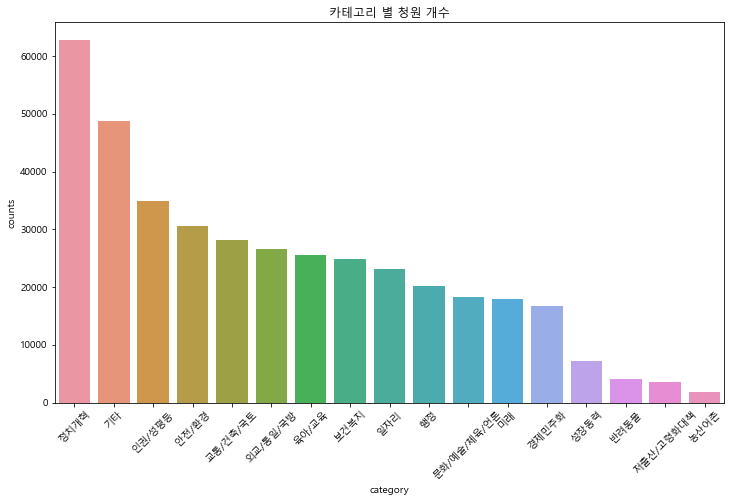

In [96]:
ax = plt.figure(figsize=(12, 7))
ax = plt.xticks(rotation=45)
ax = sns.barplot(x = 'category', y= 'counts', data = category)
ax = plt.title("카테고리 별 청원 개수")

카테고리 별 청원 개수를 bar plot으로 그려본 결과 정치개혁 분야의 청원이 제일 많고, 그 뒤를 이어 기타, 인권/성평등, 안전/환경이 위치했다.
 
 반대로 제일 적은 청원 분야는 농산어촌, 저출산/고령화 대책, 반려동물 관련인 것을 알 수 있다.  
 
 따라서 사람들은 정치개혁이나 인권/성평등 분야에 많은 문제의식을 갖고 있다고 할 수 있다. 

### 2. 카테고리 별 답변 대상 비율

20만건 이상의 투표를 받으면 답변 대상 청원이 된다. 

In [70]:
df_20 = df.loc[df['votes']>200000]
df_20.head()

,article_id,start,end,answered,votes,category,title,content,ans
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,1
25032,26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",1
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",1


In [71]:
df_20.shape

(80, 9)

In [86]:
#카테고리 별 답변 대상 청원 개수
category_20 = pd.DataFrame(df_20['category'].value_counts()).reset_index()
category_20.columns = ['category', 'counts_20']
category_20

,category,counts_20
0,인권/성평등,24
1,안전/환경,10
2,기타,8
3,정치개혁,8
4,문화/예술/체육/언론,7
5,외교/통일/국방,4
6,반려동물,4
7,육아/교육,3
8,보건복지,3
9,교통/건축/국토,3


In [88]:
new_category = pd.merge(category, category_20, how = "left", left_on='category', right_on='category')
new_category


,category,counts,counts_20
0,정치개혁,62750,8.0
1,기타,48682,8.0
2,인권/성평등,34993,24.0
3,안전/환경,30638,10.0
4,교통/건축/국토,28184,3.0
5,외교/통일/국방,26626,4.0
6,육아/교육,25537,3.0
7,보건복지,24848,3.0
8,일자리,23225,NaN
9,행정,20268,1.0


In [117]:
# 청원 개수 대비 답변 대상 비율 값을 추가
new_category['ratio'] = new_category.counts_20 / new_category.counts 
new_category

,category,counts,counts_20,ratio
0,정치개혁,62750,8.0,0.000127
1,기타,48682,8.0,0.000164
2,인권/성평등,34993,24.0,0.000686
3,안전/환경,30638,10.0,0.000326
4,교통/건축/국토,28184,3.0,0.000106
5,외교/통일/국방,26626,4.0,0.000150
6,육아/교육,25537,3.0,0.000117
7,보건복지,24848,3.0,0.000121
8,일자리,23225,NaN,NaN
9,행정,20268,1.0,0.000049


In [119]:
# 비율이 큰 순서대로 보면 다음과 같다.
new_category.sort_values(by = 'ratio', ascending = False)

,category,counts,counts_20,ratio
14,반려동물,4057,4.0,0.000986
2,인권/성평등,34993,24.0,0.000686
10,문화/예술/체육/언론,18207,7.0,0.000384
3,안전/환경,30638,10.0,0.000326
13,성장동력,7253,2.0,0.000276
1,기타,48682,8.0,0.000164
5,외교/통일/국방,26626,4.0,0.000150
0,정치개혁,62750,8.0,0.000127
7,보건복지,24848,3.0,0.000121
12,경제민주화,16793,2.0,0.000119


In [133]:
new_category['ratio'].mean()

0.00026207898765414825

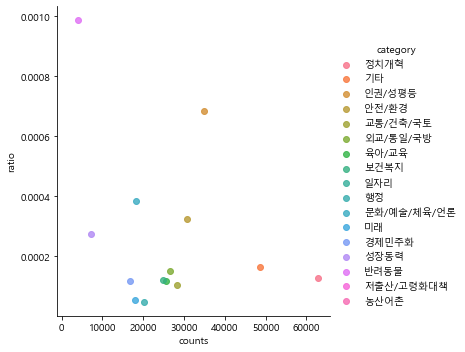

In [132]:
ax = sns.lmplot(x="counts", y="ratio", hue = "category",data = new_category)

청원 개수가 많다고 청원 답변 대상 개수도 많다고 할 수 없다. 청원 개수는 적고, 비율이 높은 반려동물 카테고리를 제외하고 보면, 청원 개수가 늘어날수록 20만표가 넘는 경우는 줄어드는 경향이 보인다.

### 3. 카테고리별 답변 대상 청원 대비 실제 답변율

In [176]:
#답변 대상인 청원을 표시하는 변수 ans를 만듬
df['ans'] =( df['votes']>200000) == 1

In [177]:
print(df.dtypes)

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
ans                     bool
month                  int64
year                   int64
day                    int64
week                   int64
year_month         period[M]
dtype: object


In [178]:
df['ans'] = df['ans'].astype('int') #ans가 bool타입이므로 int로 변경
print(df.dtypes)

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
ans                    int32
month                  int64
year                   int64
day                    int64
week                   int64
year_month         period[M]
dtype: object


In [180]:
(df['ans']==1).sum()

80

In [181]:
(df['answered']==1).sum()

29

In [199]:
(df['answered']==1).sum()

29

답변 대상인 청원은 80개인데, 실제 답변된 청원의 개수는 29개로 차이가 있다. 

카테고리별로 답변율을 비교해보려고 한다.

In [201]:
df_ans1 = df[df['ans']==1]
df_ans1.shape

(80, 14)

In [202]:
df_ans2 = df[df['answered']==1]
df_ans2.shape

(29, 14)

In [205]:
#카테고리별 답변 대상 청원
df_answer1 =pd.DataFrame(df_ans1['category'].value_counts()).reset_index()
df_answer1.columns = ['category','ans']
df_answer1

,category,ans
0,인권/성평등,24
1,안전/환경,10
2,기타,8
3,정치개혁,8
4,문화/예술/체육/언론,7
5,외교/통일/국방,4
6,반려동물,4
7,육아/교육,3
8,보건복지,3
9,교통/건축/국토,3


In [206]:
#카테고리별 답변된 청원
df_answer2 =pd.DataFrame(df_ans2['category'].value_counts()).reset_index()
df_answer2.columns = ['category','answered']
df_answer2

,category,answered
0,인권/성평등,9
1,문화/예술/체육/언론,4
2,성장동력,2
3,안전/환경,2
4,정치개혁,2
5,보건복지,2
6,교통/건축/국토,2
7,행정,1
8,육아/교육,1
9,미래,1


In [220]:
new_ans = pd.merge(df_answer1, df_answer2, how = "left", left_on='category', right_on='category')
new_ans['ratio'] = new_ans.answered / new_ans.ans
new_ans


,category,ans,answered,ratio
0,인권/성평등,24,9.0,0.375000
1,안전/환경,10,2.0,0.200000
2,기타,8,1.0,0.125000
3,정치개혁,8,2.0,0.250000
4,문화/예술/체육/언론,7,4.0,0.571429
5,외교/통일/국방,4,1.0,0.250000
6,반려동물,4,NaN,NaN
7,육아/교육,3,1.0,0.333333
8,보건복지,3,2.0,0.666667
9,교통/건축/국토,3,2.0,0.666667


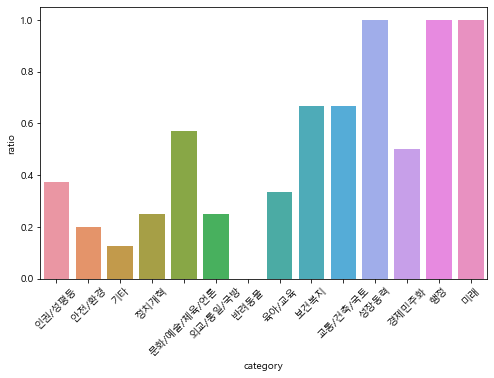

In [219]:
plt.figure(figsize=(8, 5))
plt.xticks(rotation=45)
sns.barplot(x="category", y="ratio", data = new_ans)

인권/성평등, 안전/환경, 정치개혁 등 답변 대상 청원이 많았던 카테고리의 실제 답변율은 낮은편인 것을 알 수 있다.

### 4. 요일별, 시기별 청원 개수 비교

In [174]:
import datetime
df_date = pd.DataFrame(df)
df_date['start'] = pd.to_datetime(df_date['start'], format = '%Y-%m-%d')
df_date['week'] = df_date['start'].dt.dayofweek
df_date['month'] = df_date['start'].dt.month
df_date['year'] = df_date['start'].dt.year
df_date['year_month'] = df_date['start'].dt.to_period(freq = 'M')


In [161]:
df1 = pd.DataFrame(df_date['week'].value_counts()).reset_index()
df1.columns = ['week', 'counts']
df1 = df1.sort_values('week', ascending = True)

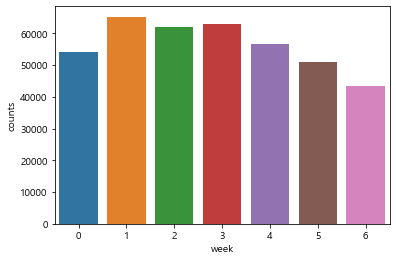

In [160]:
plt.subplots()
sns.barplot(x = 'week', y= 'counts', data = df1)
plt.show()

In [169]:
df2 = pd.DataFrame(df_date['year_month'].value_counts()).reset_index()
df2.columns = ['year_month', 'counts']
df2 = df2.sort_values('year_month', ascending = True)

월요일에 청원 개수가 가장 많고, 토요일에 가장 적다.

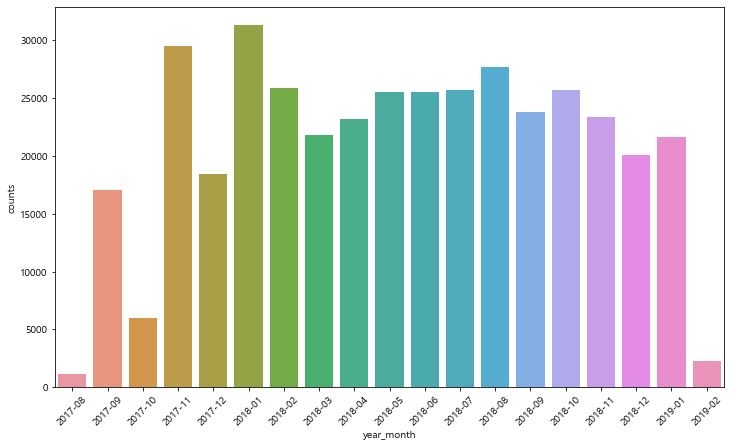

In [173]:
plt.figure(figsize=(12, 7))
plt.xticks(rotation=45)
sns.barplot(x = 'year_month', y= 'counts', data = df2)

양 극단인 2017년 8월과 2019년 2월을 제외하고 보자.

청원 개수가 제일 많은 시기는 2018년 1월이고, 가장 적은 시기는 2017년 10월이다.